In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("housing_price.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [180]:
hh=sorted(df['median_house_value'])
q1,q3=np.percentile(hh,[25,75])
lower_bound=q1-(1.5*(q3-q1))
upper_bound=q3+(1.5*(q3-q1))
below=df['median_house_value']>lower_bound
above=df["median_house_value"]<upper_bound
df=df[below&above]

In [181]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16105 non-null  float64
 1   latitude            16105 non-null  float64
 2   housing_median_age  16105 non-null  int64  
 3   total_rooms         16105 non-null  int64  
 4   total_bedrooms      16105 non-null  int64  
 5   population          16105 non-null  int64  
 6   households          16105 non-null  int64  
 7   median_income       16105 non-null  float64
 8   median_house_value  16105 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [182]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16105.00000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000,16105.000000
mean,-119.55461,35.647306,28.298727,2628.785719,541.835082,1447.544365,503.432536,3.674959,191068.320149
std,2.00719,2.152595,12.494569,2183.690159,424.165286,1161.389194,386.907276,1.565270,95886.412230
min,-124.35000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.74000,33.930000,18.000000,1451.000000,298.000000,800.000000,283.000000,2.522100,116200.000000
50%,-118.50000,34.260000,28.000000,2112.000000,436.000000,1181.000000,410.000000,3.450900,173400.000000
75%,-117.99000,37.730000,37.000000,3127.000000,651.000000,1746.000000,607.000000,4.588100,246800.000000
max,-114.31000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,483300.000000


In [183]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df.drop(["median_house_value"],axis=1)
y=df.median_house_value


In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.8)
x_train.shape,y_train.shape

((12884, 8), (12884,))

In [188]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [189]:
reg.score(x_test,y_test)

0.6220322463200181

In [190]:
reg.coef_

array([-4.03466889e+04, -3.93710809e+04,  9.17530690e+02, -9.64967603e+00,
        1.02343075e+02, -2.86442508e+01,  4.13844458e+01,  3.89955359e+04])

In [191]:
reg.intercept_

-3407819.6954138484

In [192]:
pred=reg.predict(x_test)
pred=pd.DataFrame({'actual':y_test,'predicted':pred})
df1=pred.head()
df1

,actual,predicted
5568,166700,173745.520689
11884,152400,180807.425120
9095,42500,84459.433469
3998,150300,170541.962386
2003,224400,255768.641668


In [193]:
residual=y_test-reg.predict(x_test)

In [194]:
import statsmodels.api as sm
x2=sm.add_constant(x)
est=sm.OLS(y,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3114.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:            -2.0006e+05
No. Observations:               16105   AIC:                         4.001e+05
Df Residuals:                   16096   BIC:                         4.002e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.368e+06   6.12

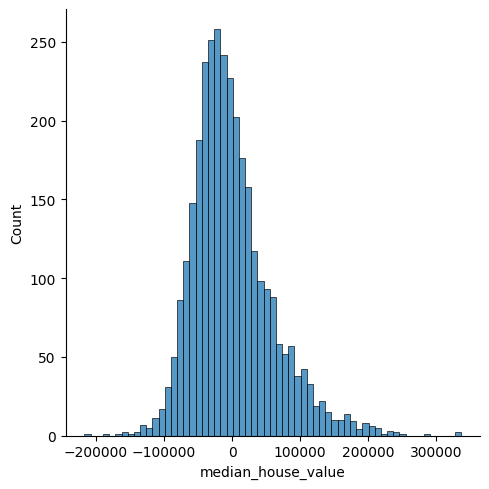

In [195]:
import seaborn as sns
residual=y_test-reg.predict(x_test)
sns.displot(residual)
plt.show()

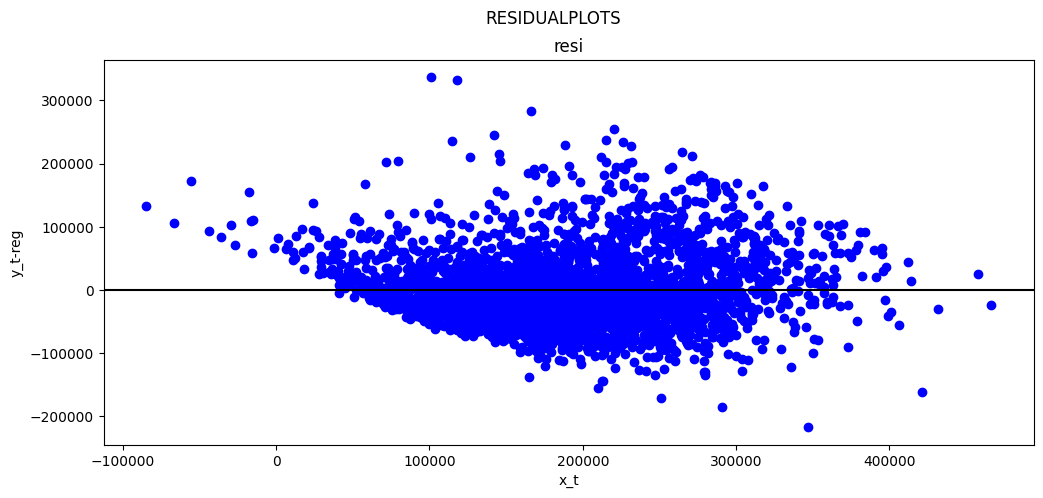

In [196]:
fig,axes=plt.subplots(1,1)
fig.suptitle('RESIDUALPLOTS')
fig.set_size_inches(12,5)
axes.scatter(reg.predict(x_test),(y_test-reg.predict(x_test)),color="b")
axes.axhline(y=0,color='k')
axes.set_title("resi")
axes.set_xlabel('x_t')
axes.set_ylabel("y_t-reg")
plt.show()

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["feature"]=x.columns
vif

,VIF,feature
0,629.394654,longitude
1,549.245407,latitude
2,7.431278,housing_median_age
3,31.766964,total_rooms
4,98.525883,total_bedrooms
5,16.828562,population
6,94.724445,households
7,10.782704,median_income


In [198]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=7.74,normalize=True)
ridgereg.fit(x_train,y_train)
predd=ridgereg.predict(x_test)
score=ridgereg.score(x_test,y_test)
score

C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.10431729014560032

In [199]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=7.74)
lasso.fit(x_train,y_train)
preddd=lasso.predict(x_test)
score=lasso.score(x_test,y_test)
score

0.6220354318458444

In [200]:
predictors=x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'median_income'),
  Text(0.0, 0, 'longitude'),
  Text(1.0, 0, 'latitude'),
  Text(2.0, 0, 'population'),
  Text(3.0, 0, 'total_rooms'),
  Text(4.0, 0, 'households'),
  Text(5.0, 0, 'total_bedrooms'),
  Text(6.0, 0, 'housing_median_age'),
  Text(7.0, 0, 'median_income'),
  Text(8.0, 0, '')])

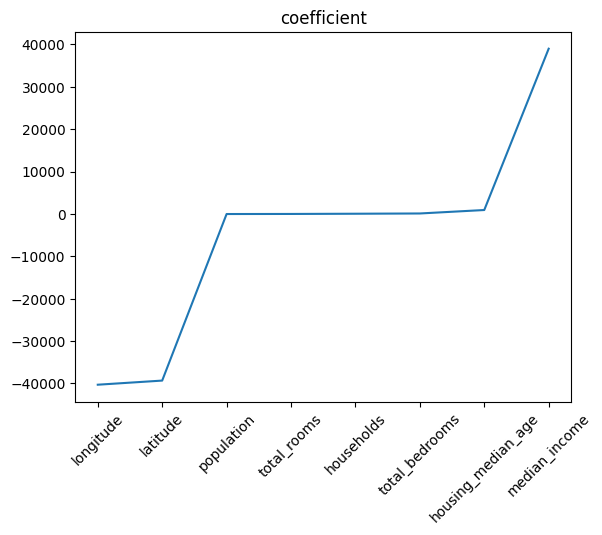

In [201]:
coef=pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind="line",title="coefficient")
plt.xticks(rotation=45)

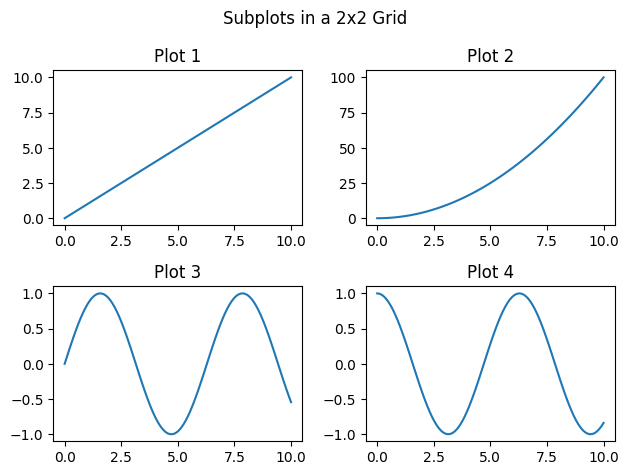

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.linspace(0, 10, 100)
y1 = x
y2 = x ** 2
y3 = np.sin(x)
y4 = np.cos(x)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2)
fig.suptitle('Subplots in a 2x2 Grid')

# Plot data in each subplot
axes[0, 0].plot(x, y1)
axes[0, 0].set_title('Plot 1')

axes[0, 1].plot(x, y2)
axes[0, 1].set_title('Plot 2')

axes[1, 0].plot(x, y3)
axes[1, 0].set_title('Plot 3')

axes[1, 1].plot(x, y4)
axes[1, 1].set_title('Plot 4')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


In [203]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Ridge Regression model
ridge = Ridge()

# Specify a range of alpha values to consider
alphas = np.logspace(-3, 2, 10)  # Range from 0.001 to 100

# Perform a grid search to find the best alpha
grid = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas})
grid.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)


Best alpha: 7.742636826811277
